# In-depth Analysis (Applying Machine Learning)

## Step 1) Read the Manual

Before we progress further, we display the information about the dataset that we obtained from the dataset manual, that is, from Kaggle and the UCI Machine Learning Repository.

From Kaggle, an overview of the variables:

There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) default.payment.next.month: Default payment (1=yes, 0=no)

And from UCI:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
* X2: Gender (1 = male; 2 = female). 
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
* X4: Marital status (1 = married; 2 = single; 3 = others). 
* X5: Age (year). 
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

Potential issue: We'll want to group values 5 and 6 for Education into one value (looking at the Kaggle description) since they both stand for "unknown". And perhaps we'll want to include 4 in that grouping since it has the value of "others".

## Step 2) Review the Data Types

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import random
import sklearn

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
filename = 'UCI_Credit_Card.csv'

In [3]:
data = pd.read_csv(filename) #, index_col=0)
data = data.drop(columns='ID') # don't need ID column, because just the index + 1

In [4]:
pd.set_option('display.max_columns', 500)
data.sample(5).T

,13219,7554,2686,27958,5854
LIMIT_BAL,50000.0,50000.0,360000.0,20000.0,30000.0
SEX,1.0,1.0,1.0,2.0,1.0
EDUCATION,2.0,2.0,2.0,1.0,3.0
MARRIAGE,2.0,2.0,2.0,2.0,1.0
AGE,32.0,31.0,48.0,28.0,53.0
PAY_0,0.0,1.0,0.0,2.0,0.0
PAY_2,0.0,2.0,0.0,2.0,0.0
PAY_3,0.0,0.0,0.0,2.0,-2.0
PAY_4,0.0,0.0,0.0,2.0,-2.0
PAY_5,0.0,0.0,0.0,2.0,-2.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1  

All columns in this dataset have a numeric type. They are either float-valued (continuous) or int-valued (discrete). Nothing seems to be off, so we may continue.

In [6]:
display(data.shape)

(30000, 24)

## Step 3) Fixing the Issues (Data Cleaning):

### Problem 1: Get rid of Bad Column Names


In [7]:
## Rename columns
data.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'default'}, inplace=True)

### Problem 2: Replace Negative Values with 0 in Pay_X columns

To deal with with values for the PAY_X columns, a sensible solution is to convert all non-positive values to 0. The dataset description says that a value of -1 means "pay duly" and positive values represent a payment delay by that number of months. Therefore, converting -1 and -2 values to 0, and having 0 represent "pay duly" is logical.

In [8]:
for i in range(1,7):
    data.loc[data["PAY_" + str(i)] < 0, "PAY_" + str(i)] = 0

### Problem 3: Get rid of Values of 0 for Marriage

A logical move is to group the 0 values with the "Other" values, coded as 3, so that is what we'll do:


In [9]:
data.loc[data["MARRIAGE"] == 0, 'MARRIAGE'] = 3

"Other" for marriage can possibly refer to divorced, widowed, seperated, etc.

### Problem 4: Get rid of 0 Values for Education

Currently coded as:
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

We see that 0 is not even in the dataset desciption, and we have 2 values for unknown. So a logical move is to convert the 0, 5 and 6 values to 4, which is what we'll do. "Other" can  refer to education less than high school or perhaps vocational training.

In [10]:
replace = (data["EDUCATION"] == 0) | (data["EDUCATION"] == 5) | (data["EDUCATION"] == 6) 
data.loc[replace,'EDUCATION'] = 4

## Step 4) Analysis

### Preprocessing

Now need to deal with SEX, EDUCATION, and MARRIAGE appropriately.

Let's examine the PAY_X columns now:

In [11]:
df = data[['PAY_6', 'PAY_5', 'BILL_AMT6', 'PAY_AMT6']]
df.columns = ['Repayment status in April', 'Repayment status in May', 'Amount of bill statement in April', 'Amount of previous payment in April']

In [12]:
df.loc[(df['Amount of bill statement in April'] < df['Amount of previous payment in April']) & (df['Repayment status in April'] < df['Repayment status in May'])].head()

,Repayment status in April,Repayment status in May,Amount of bill statement in April,Amount of previous payment in April
68,0,2,7319.0,13899.0
436,0,2,150.0,200.0
1875,0,2,107495.0,116880.0
2262,0,2,39819.0,223833.0
2272,0,2,244.0,856.0


Represent instances where our repayment status is **worse** and we've paid more than our bill.

### Steps Involved in Classification in Scikit-Learn

1. Preprocess Data
2. Create Train and Test Sets
3. Instantiate the model/estimator  
(Steps 1 and 3 can be combined in a Pipeline object)
4. Specify Hyperparameter Space
5. Instantiate GridSearchCV or RandomizedSearchCV objects
6. Fit CV object to the Training Set
7. Predict on the Test Set
8. Compute Scores for the Model

*Models*:
1. Logistic Regression (LR)
2. K-Nearest Neighbor (KNN)
3. Support Vector Machine (SVM)
4. Decision Trees (DT)
5. Random Forest

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, scale, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from scipy.stats import randint
import time

In [14]:
#### Step 1) Preprocess Data

# We will train our classifier with the following features:
# Numeric features to be scaled: LIMIT_BAL, AGE, PAY_X, BIL_AMTX, and PAY_AMTX
# Categorical features: SEX, EDUCATION, MARRIAGE

# We create the preprocessing pipelines for both numeric and categorical data
numeric_features = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
                   ]



data['PAY_1'] = data.PAY_1.astype('float64')
data['PAY_2'] = data.PAY_2.astype('float64')
data['PAY_3'] = data.PAY_3.astype('float64')
data['PAY_4'] = data.PAY_4.astype('float64')
data['PAY_5'] = data.PAY_5.astype('float64')
data['PAY_6'] = data.PAY_6.astype('float64')
data['AGE'] = data.AGE.astype('float64')

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(categories='auto'))
])

In [15]:
# label_features = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
# label_transformer = Pipeline(steps=[
#     ('label', LabelEncoder())
# ])
# Use StratifiedShuffleSplit to get it to work

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        #,('lab', label_transformer, label_features)
    ])

In [17]:
#### Step 2) Split Data into Training and Test Sets

y = data['default']#.values
X = data.drop(['default'], axis=1)#.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

##### *1st Model: Logistic Regression*

In [18]:
#### Step 3: Instantiate the Estimator

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
from sklearn.linear_model import LogisticRegression

lr = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', LogisticRegression(solver='liblinear'))])

#### Step 4: Specify the Hyperparameter Space

param_grid_lr = {
    
    'classifier__C': np.logspace(-5, 8, 15),
    'classifier__penalty': ['l1', 'l2']
}

#### Step 5: Instantiate the CV Object

lr_cv = GridSearchCV(lr, param_grid_lr, cv=5, iid=False)

#### Step 6: Fit on Training

t0 = time.time()
lr_cv.fit(X_train, y_train)
print("It takes ", time.time() - t0, " seconds for LR fitting")

#### Step 7: Predict on Test

y_pred_lr = lr_cv.predict(X_test)

#### Step 8: Scoring

##### Accuracy

print("Mean cross-validated score of the best estimator: %.3f" % lr_cv.best_score_)
# Latest accuracy is 0.82

print("Accuracy with LR on testing set is: %.3f" % lr_cv.score(X_test, y_test))
# Latest accuracy is 0.82

print("Accuracy with LR on training set is: %.3f" % lr_cv.score(X_train, y_train))
# Latest accuracy is 0.82

It takes  56.77130126953125  seconds for LR fitting
Mean cross-validated score of the best estimator: 0.815
Accuracy with LR on testing set is: 0.824
Accuracy with LR on training set is: 0.816


Same thing, but uses LogisticRegressionCV() object instead of LogisticRegression() Object

In [19]:
# from sklearn.linear_model import LogisticRegressionCV
# lr_cv2 = Pipeline(steps=[('preprocessor', preprocessor),
#                      ('classifier', LogisticRegressionCV(solver='liblinear', cv=10, Cs=np.logspace(-5, 8, 15) ))])
# lr_cv2.fit(X_train, y_train)

# lr_cv2.score(X_test, y_test)

# lr_cv2.named_steps['classifier'].C_

###### Best parameters

In [20]:
print("mean cross-validated score of the best_estimator: %.3f " % lr_cv.best_score_)
print("Parameter setting that gave the best results on the hold out data: C = %.3f" % lr_cv.best_params_.get('classifier__C'))
print("Parameter setting that gave the best results on the hold out data: penalty =", lr_cv.best_params_.get('classifier__penalty'))

mean cross-validated score of the best_estimator: 0.815 
Parameter setting that gave the best results on the hold out data: C = 31.623
Parameter setting that gave the best results on the hold out data: penalty = l2


In [21]:
coefs = lr_cv.best_estimator_.named_steps['classifier'].coef_
print("Total Number of Features:", coefs.size)
print(" Number of Selected Features:", np.count_nonzero(coefs))

Total Number of Features: 29
 Number of Selected Features: 29


Looking at records with low probability of default, but that default:

In [22]:
train_data = X_train.join(y_train)
test_data = X_test.join(y_test)

if ('prob_of_default' in train_data):
    train_data = train_data.drop(columns=['prob_of_default'])
if ('prob_of_default' in test_data):
    test_data = test_data.drop(columns=['prob_of_default'])

probs_train = lr_cv.predict_proba(X_train)[:,1] # probs = probability of default
probs_test = lr_cv.predict_proba(X_test)[:,1] # probs = probability of default

train_data['prob_of_default'] = probs_train
test_data['prob_of_default'] = probs_test

train_data['train/test'] = 'train'
test_data['train/test'] = 'test'

new_data = train_data.append(test_data).sort_index()

In [23]:
train_ranked = new_data.loc[new_data['train/test'] == 'train'].sort_values(by='prob_of_default')
test_ranked = new_data.loc[new_data['train/test'] == 'test'].sort_values(by='prob_of_default')

These guys in the training set default with a low probability of default:

In [24]:
train_ranked.loc[(train_ranked.prob_of_default < 0.5) & (train_ranked.default == 1)].head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prob_of_default,train/test
18967,480000.0,2,2,2,30.0,0.0,0.0,0.0,0.0,0.0,0.0,470400.0,0.0,0.0,0.0,0.0,330982.0,0.0,0.0,0.0,0.0,330982.0,30000.0,1,0.009841,train


1. Individual 18967 defaults with an assigned default probability of about 1%. This seems to have happened because she had a very large bill statement in September, just before the bankruptcy point. One takeaway then is to look at all customers with large bills in September and see how many default. 

In [25]:
train_ranked.loc[(train_ranked.PAY_1 == 0 ) & (train_ranked.BILL_AMT1 > 0)].default.mean()

0.136935318275154

It's not the case that customers with PAY_1 = 0 and BILL_AMT1 > 0 default more than the average. Actually, they default less than the average. What about if we also factor in PAY_AMT1?

In [26]:
train_ranked.loc[(train_ranked.PAY_1 == 0 ) & (train_ranked.BILL_AMT1 > 0) & (train_ranked.PAY_AMT1 == 0)].default.mean()

0.2199248120300752

Definately higher, but only about the mean now. Can't create rule based on this.

In [27]:
train_ranked.corr()['prob_of_default'].sort_values(ascending=False)

prob_of_default    1.000000
PAY_1              0.908686
PAY_2              0.755744
PAY_3              0.653520
PAY_4              0.599631
PAY_5              0.583447
PAY_6              0.557886
default            0.435856
EDUCATION          0.076745
AGE                0.031177
BILL_AMT6         -0.013480
BILL_AMT5         -0.014914
BILL_AMT4         -0.024692
BILL_AMT3         -0.029242
BILL_AMT2         -0.029686
BILL_AMT1         -0.040523
MARRIAGE          -0.060879
SEX               -0.080430
PAY_AMT6          -0.117356
PAY_AMT2          -0.125899
PAY_AMT4          -0.126983
PAY_AMT5          -0.129704
PAY_AMT3          -0.148114
PAY_AMT1          -0.177647
LIMIT_BAL         -0.345456
Name: prob_of_default, dtype: float64

Probability of default is most highly correlated with repayment status, with stength of correlation increasing with time. Makes sense.

**Classification Report**

In [28]:
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[6724  285]
 [1296  695]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7009
           1       0.71      0.35      0.47      1991

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.81      0.82      0.80      9000



**ROC Curve**

In [29]:
y_pred_prob = lr_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)

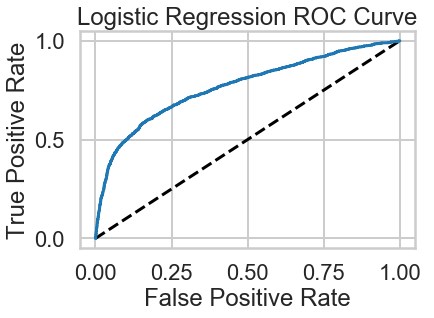

In [30]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

*Area under the Curve*

In [31]:
roc_auc_score(y_test, y_pred_prob)

0.7682243444050086

In [32]:
# cv_scores = cross_val_score(lr_cv, X, y, cv=5, scoring='roc_auc')
# cv_scores

**Comparing to a Dumb Model**

Let's create a dumb model that always predicts 0 (no-default) so we can see how well our model actually does.

In [33]:
dumb_predictions = (lr_cv.predict_proba(X_test)[:,0] >= max(lr_cv.predict_proba(X_test)[:,0])).astype(int)
# we use max(lr_cv.predict_proba(X_test)[:,0]) so we don't get the warnings associated with having zero predictions for a class

In [34]:
print(confusion_matrix(y_test, dumb_predictions))

[[7008    1]
 [1991    0]]


In [35]:
print(classification_report(y_test, dumb_predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

   micro avg       0.78      0.78      0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



In [36]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7009
           1       0.71      0.35      0.47      1991

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.81      0.82      0.80      9000



So by comparing our model to the dumb model by precision and f1-score in addition to simple recall, we see that our model is in fact a substantial improvement. Precision increases by 0.2, and the f1-score by 0.12. 

#### 2nd Model: KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

#3
knn = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', KNeighborsClassifier())])
#4
param_grid_knn = {
    'classifier__n_neighbors': np.arange(1,20)
}

#5
knn_cv = RandomizedSearchCV(knn, param_grid_knn, cv=3, iid=False)

#6
t0 = time.time()
knn_cv.fit(X_train, y_train)
print("It takes ", time.time() - t0, " seconds for KNN fitting")
# takes 185 seconds with 5 folds, 1 to 20 neighbors,

#7
y_pred_knn = knn_cv.predict(X_test)

#8
print("Accuracy with KNN on the test set is: ", knn_cv.score(X_test, y_test))
# latest accuracy is 0.81

It takes  84.56321477890015  seconds for KNN fitting
Accuracy with KNN on the test set is:  0.8103333333333333


In [38]:
print("mean cross-validated score of the best_estimator: %.3f " % knn_cv.best_score_)
print("Parameter setting that gave the best results on the hold out data: n_neighbors =", knn_cv.best_params_.get('classifier__n_neighbors'))

mean cross-validated score of the best_estimator: 0.807 
Parameter setting that gave the best results on the hold out data: n_neighbors = 13


**Classification Report**

In [39]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[6640  369]
 [1338  653]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7009
           1       0.64      0.33      0.43      1991

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.74      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000



**ROC Curve**

In [40]:
y_pred_prob = knn_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)

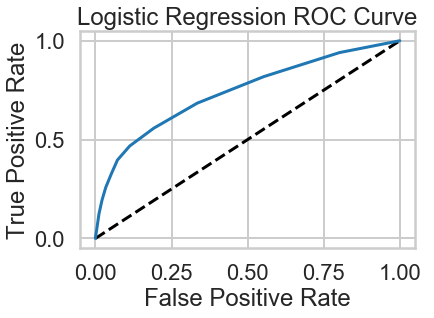

In [41]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

*Area under the Curve*

In [42]:
roc_auc_score(y_test, y_pred_prob)

0.7394815763531125

In [43]:
# cv_scores = cross_val_score(knn_cv, X, y, cv=5, scoring='roc_auc')
# cv_scores

#### 3nd Model: Support Vector Machine

In [44]:
from sklearn.svm import SVC
#3
svm = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', SVC())])
#4
param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01]
}

#5
svm_cv = RandomizedSearchCV(svm, param_grid_svm, cv=3, iid=False)

#6
t0 = time.time()
svm_cv.fit(X_train, y_train)
print("It takes ", time.time() - t0, " seconds for SVM fitting")
# takes 272 seconds with 3 folds

#7
y_pred_svm = svm_cv.predict(X_test)

#8
print("Mean cross-validated score of the best estimator: %.3f" % svm_cv.best_score_)
print("Accuracy with SVM on testing set is: %.3f" % svm_cv.score(X_test, y_test))
print("Accuracy with SVM on training set is: %.3f" % svm_cv.score(X_train, y_train))



It takes  361.7126262187958  seconds for SVM fitting
Mean cross-validated score of the best estimator: 0.816
Accuracy with SVM on testing set is: 0.823
Accuracy with SVM on training set is: 0.818


**Classification Report**

In [45]:
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[6652  357]
 [1237  754]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.68      0.38      0.49      1991

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.81      0.82      0.80      9000



#### 4th Model: Decision Tree

In [46]:
# Import necessary modules 
from sklearn.tree import DecisionTreeClassifier

#3
dt = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', DecisionTreeClassifier())])
#4
# Setup the parameters and distributions to sample from: param_dist
param_grid_dt = {'classifier__max_depth': [3, None],
                'classifier__max_features': randint(1, 9),
                'classifier__min_samples_leaf': randint(1, 9),
                'classifier__criterion': ["gini", "entropy"]}

#5
dt_cv = RandomizedSearchCV(dt, param_grid_dt, cv=10, iid=False)

#6
t0 = time.time()
dt_cv.fit(X_train, y_train)
print("It takes ", time.time() - t0, " seconds for DT fitting")
# takes 11 seconds with 10 folds

#7
y_pred_dt = dt_cv.predict(X_test)

#8
print("Mean cross-validated score of the best estimator: %.3f" % dt_cv.best_score_)
print("Accuracy with LR on testing set is: %.3f" % dt_cv.score(X_test, y_test))
print("Accuracy with LR on training set is: %.3f" % dt_cv.score(X_train, y_train))

y_pred_prob = dt_cv.predict_proba(X_test)[:,1]
print("ROC AUC score is: %.3f" % roc_auc_score(y_test, y_pred_prob))

It takes  7.278775930404663  seconds for DT fitting
Mean cross-validated score of the best estimator: 0.812
Accuracy with LR on testing set is: 0.809
Accuracy with LR on training set is: 0.807
ROC AUC score is: 0.726


**Classification Report**

In [47]:
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[6804  205]
 [1514  477]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.70      0.24      0.36      1991

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.76      0.61      0.62      9000
weighted avg       0.79      0.81      0.77      9000



#### 5th Model: RandomForest

In [48]:
%run import_data.py

<Figure size 432x288 with 0 Axes>

In [49]:
%run -i std_preprocessing_and_splitting.py

In [50]:
# Import necessary modules 

from sklearn.ensemble import RandomForestClassifier

#3
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier())])
#4
# Setup the parameters and distributions to sample from: param_dist
param_grid_rf = {'classifier__n_estimators': [1, 10, 50, 100]}

#5
rf_cv = GridSearchCV(rf, param_grid_rf, cv=10, iid=False)

#6
t0 = time.time()
rf_cv.fit(X_train, y_train)
print("It takes ", time.time() - t0, " seconds for Random Forest fitting")

#7
y_pred_rf = rf_cv.predict(X_test)

#8
print("Mean cross-validated score of the best estimator: %.3f" % rf_cv.best_score_)
print("Accuracy with Random Forest on testing set is: %.3f" % rf_cv.score(X_test, y_test))
print("Accuracy with Random Forest on training set is: %.3f" % rf_cv.score(X_train, y_train))

y_pred_prob = rf_cv.predict_proba(X_test)[:,1]
print("ROC AUC score is: %.3f" % roc_auc_score(y_test, y_pred_prob))

It takes  75.14398455619812  seconds for Random Forest fitting
Mean cross-validated score of the best estimator: 0.814
Accuracy with Random Forest on testing set is: 0.818
Accuracy with Random Forest on training set is: 0.999
ROC AUC score is: 0.776


In [51]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[6610  399]
 [1242  749]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.65      0.38      0.48      1991

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



**Conclusion**

Similar accuracy achieved on all 5 models, and all 5 models are better than the Naive, dumb model of assuming noone defaults.